In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
df = pd.read_csv('advertising-Copy1.csv')

In [64]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 62.5+ KB


In [66]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


LinAlgError: singular matrix

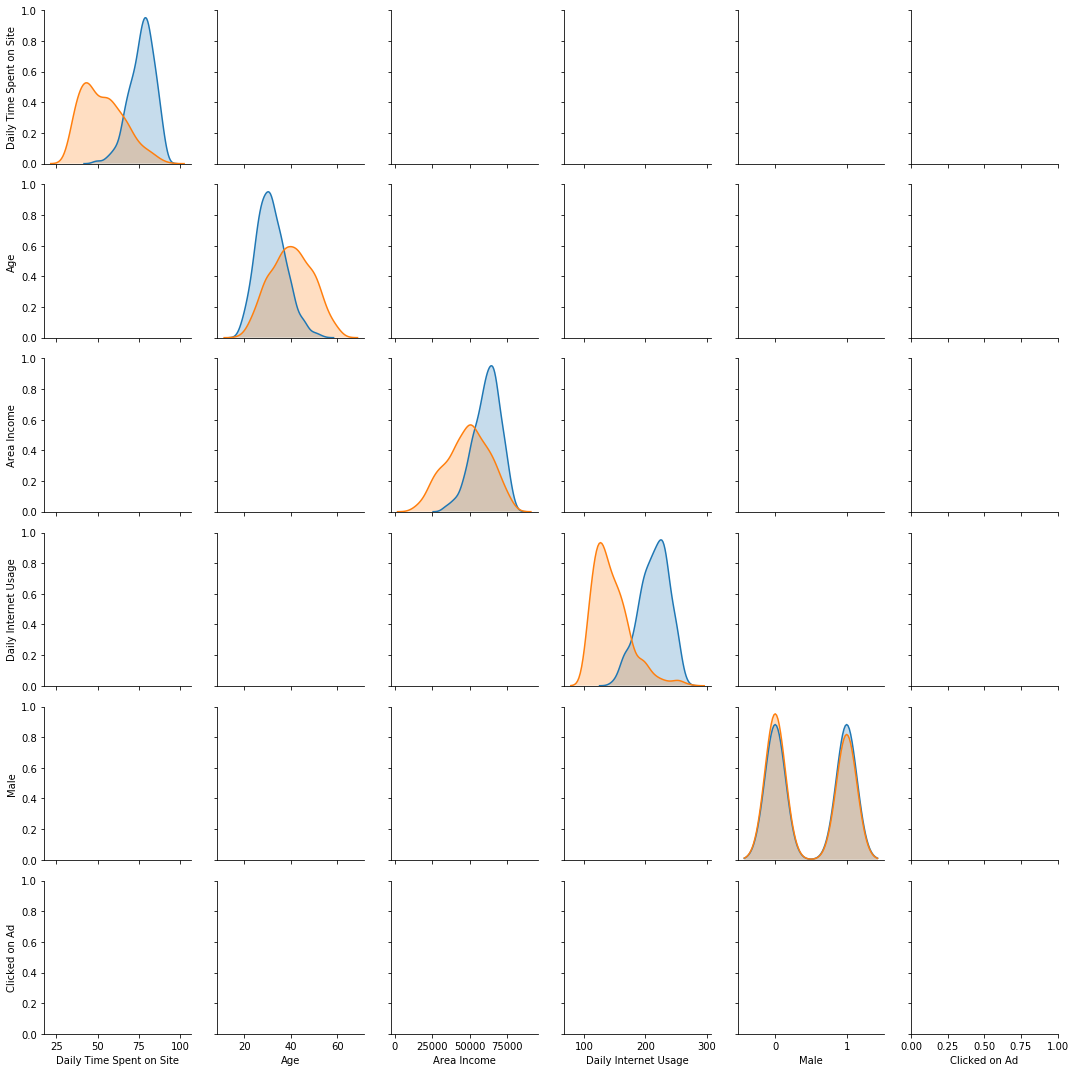

In [67]:
sns.pairplot(data = df,hue='Clicked on Ad')

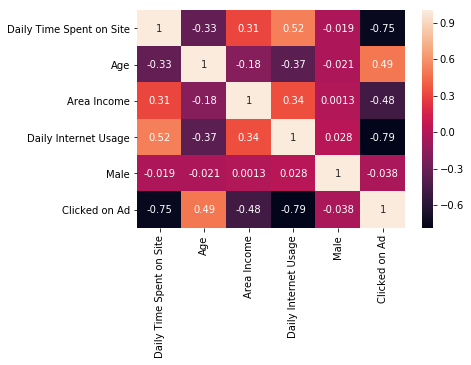

In [68]:
sns.heatmap(df.corr(),annot = True)

In [69]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

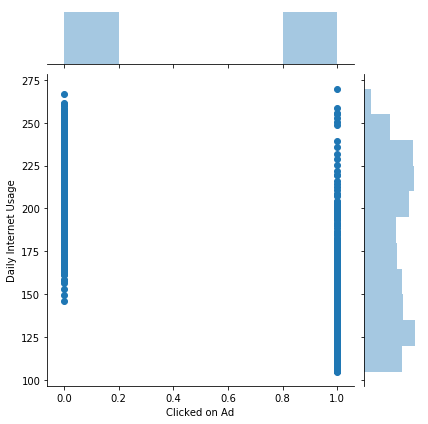

In [70]:
sns.jointplot(x = 'Clicked on Ad',y = 'Daily Internet Usage',data = df)

(array([35., 29., 47., 45., 43., 43., 37., 26., 41., 30., 32., 36., 26.,
        25., 26., 30., 43., 45., 36., 49., 40., 50., 45., 48., 26., 22.,
        23., 17.,  3.,  2.]),
 array([104.78 , 110.286, 115.792, 121.298, 126.804, 132.31 , 137.816,
        143.322, 148.828, 154.334, 159.84 , 165.346, 170.852, 176.358,
        181.864, 187.37 , 192.876, 198.382, 203.888, 209.394, 214.9  ,
        220.406, 225.912, 231.418, 236.924, 242.43 , 247.936, 253.442,
        258.948, 264.454, 269.96 ]),
 <a list of 30 Patch objects>)

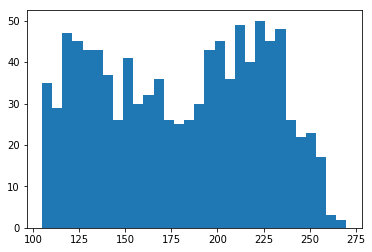

In [71]:
plt.hist(x = 'Daily Internet Usage',data=df,bins = 30)

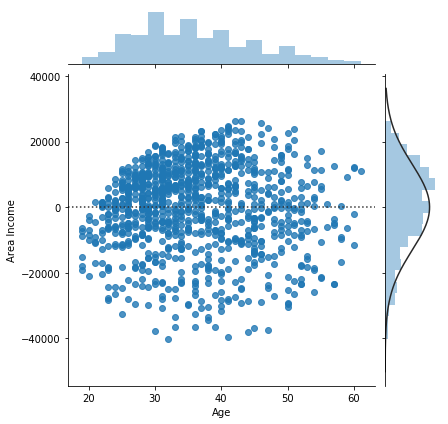

In [72]:
sns.jointplot(x = 'Age',y = 'Area Income',data = df,kind = 'reside')

In [89]:
from sklearn.model_selection import train_test_split

In [104]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [118]:
df.drop(['Timestamp'],axis = 1,inplace  =True)

In [119]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage','Male']]
y = df['Clicked on Ad']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
log = LogisticRegression()

In [123]:
log.fit(X_train,y_train)

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
predictions = log.predict(X_test)

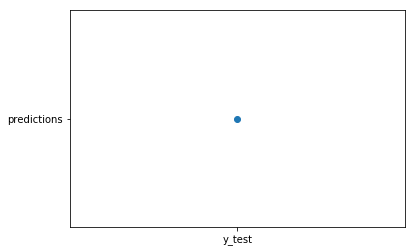

In [127]:
plt.scatter(x = 'y_test',y = 'predictions',data = df)

In [128]:
from sklearn.metrics import classification_report,confusion_matrix

In [129]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [130]:
confusion_matrix(y_test,predictions)

array([[149,   8],
       [ 15, 128]], dtype=int64)